In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)


In [8]:

dir_p = r'C:\Users\Honeyz\Desktop\Aessa\THE_SIS\PyroDataProcessed.csv'
raw_dataset = pd.read_csv(dir_p, skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset

,C% Biomass,H% Biomass,O% Biomass,N% Biomass,C% HDPE,H% HDPE,O% HDPE,N% HDPE,C% PS,H% PS,O% PS,N% PS,Time,Rate,Ratio,Temp,Oil%,Char%,Gas%
0,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,66.7,500,60.156065,10.936392,28.907543
1,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,100.0,500,56.000000,0.000000,44.000000
2,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,50.0,500,45.993999,17.313035,36.692966
3,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,33.3,500,44.038082,23.267154,32.694764
4,63.85,8.6,3.74,0.33,85.72,14.28,0,0.0,0.0,0.0,0.0,0,0.5,5,0.0,500,25.762381,34.435228,39.802391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,60.0,550,16.633680,15.340660,13.907280
243,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,61.5,550,15.999231,14.779844,13.749581
244,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,63.0,550,15.349117,14.221099,13.605475
245,58.00,6.3,34.00,2.40,0.00,0.00,0,0.0,91.0,8.8,0.3,0,30.0,100,64.5,550,14.683338,13.664426,13.474963


In [9]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, :16].values
y = dataset.iloc[:, 16:].values

#divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Algorithm


In [11]:
regressor = RandomForestRegressor(n_estimators=2000, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Evaluating the Algorithm


In [12]:
mse_one = mean_squared_error(y_test[:,0], y_pred[:,0])
mse_two = mean_squared_error(y_test[:,1], y_pred[:,1])
mse_three = mean_squared_error(y_test[:,2], y_pred[:,2])
print(f'MSE for first regressor: {mse_one} - second regressor: {mse_two}- Third regressor: {mse_three}')
mae_one = mean_absolute_error(y_test[:,0], y_pred[:,0])
mae_two = mean_absolute_error(y_test[:,1], y_pred[:,1])
mae_three = mean_absolute_error(y_test[:,2], y_pred[:,2])
print(f'MAE for first regressor: {mae_one} - second regressor: {mae_two}- second regressor: {mae_three}')


MSE for first regressor: 34.86557180575615 - second regressor: 0.4383012824186846- Third regressor: 0.6814313127397643
MAE for first regressor: 1.7906047363472721 - second regressor: 0.49192544448127173- second regressor: 0.4840942165596151


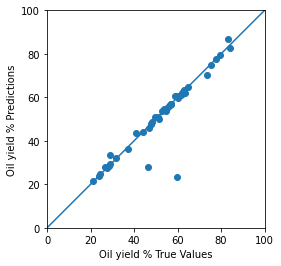

In [18]:
y_pred = regressor.predict(X_test)

Pred_oil = y_pred[:,0]
test_oil = y_test[:,0]
Pred_char = y_pred[:,1]
test_char = y_test[:,1]
Pred_gas = y_pred[:,2]
test_gas = y_test[:,2]


a = plt.axes(aspect='equal')
plt.scatter(test_oil, Pred_oil)
plt.xlabel('Oil yield % True Values')
plt.ylabel('Oil yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)




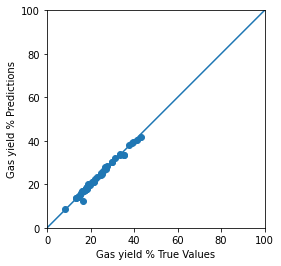

In [19]:
a = plt.axes(aspect='equal')
plt.scatter(test_gas, Pred_gas)
plt.xlabel('Gas yield % True Values')
plt.ylabel('Gas yield % Predictions')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

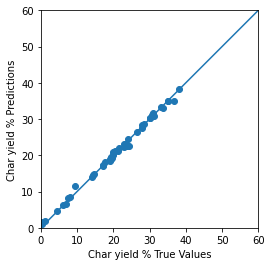

In [21]:
a = plt.axes(aspect='equal')
plt.scatter(test_char, Pred_char)
plt.xlabel('Char yield % True Values')
plt.ylabel('Char yield % Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)